# Modulo 2 - Introdução ao Modelo Dinâmico

Os modelos dinâmicos são essenciais para compreender a dinâmica do sistema em malha aberta (modo manual) ou para controlo em Malha fechada (automático). Estes modelos ou derivam de dados (empíricos) ou de relações mais fundamentais (primeiros princípios, baseados na física) que dependem do conhecimento do processo. Uma combinação das duas abordagens é frequentemente utilizada na prática onde a forma das equações é desenvolvida a partir de equações de equilíbrio fundamental e parâmetros desconhecidos ou incertos são ajustados para se ajustarem aos dados do processo.

Na engenharia, existem 4 equações de equilíbrio comuns a partir de princípios de conservação, incluindo massa, dinâmica, energia e espécies (ver Equações de Equações de Equilíbrio). Uma alternativa aos modelos baseados na física é a utilização de dados input-output para desenvolver modelos empíricos dinâmicos, tais como sistemas de primeira ou segunda ordem.


## Etapas na Modelação Dinâmica

Seguem-se as orientações gerais para o desenvolvimento de um modelo dinâmico. O processo é iterativo, pois os resultados da simulação ajudam a informar os pressupostos da modelação ou a corrigir erros nas equações de equilíbrio dinâmico.

1. Identificar objectivo para a simulação
2. Desenhar um diagrama esquemático, variáveis do processo de etiquetagem
3. Listar todos os pressupostos
4. Determinar a dependência espacial
    * sim = Equação Diferencial Parcial (PDE)
    * não = Equação Diferencial Ordinária (ODE)
5. Escrever balanços dinâmicos (massa, espécie, energia)
6. Outras relações (termo, reacções, geometria, etc.)
7. Graus de liberdade, o número de equações = número de incógnitas?
8. Classifique as entradas como
    * Valores fixos
    * Perturbações
    * Variáveis manipuladas
9. Classificar os resultados como
    * Estados
    * Variáveis controladas
10. Simplificar as equações de equilíbrio baseadas em pressupostos
11. Simular condições de estado estacionário (se possível)
12. Simular a saída com uma etapa de entrada

### Um Exemplo Inicial: Encher um tanque de água


Considerar um tanque cilíndrico sem fluxo de saída e um fluxo de entrada ajustável. O caudal de entrada não é medido, mas há uma medição de nível que mostra a quantidade de fluido que foi adicionado ao tanque. O objectivo deste exercício é desenvolver um modelo que possa manter um determinado nível de água, ajustando automaticamente o caudal de entrada. 

**Nota** : Ver a secção seguinte sobre controlo apenas P para o desenho do controlador de nível do tanque.

<p align="center">
  <img width="300" height="300" src= "https://apmonitor.com/pdc/uploads/Main/tank_model_no_outlet.png">
</p>

Diagrama de um tanque com uma entrada e sem saída. O símbolo LT é uma abreviatura para Transmissor de Nível.

Um primeiro passo é desenvolver um modelo dinâmico de como o caudal de entrada afecta o nível no tanque. Um ponto de partida para este modelo é uma equação de equilíbrio.

$$\frac{\mathrm{d} m }{\mathrm{d} t} = \dot{m_{Entrada}} -\dot{m_{Saida}}$$

O termo de acumulação é uma variável diferencial tal como $\frac{\mathrm{d} m }{\mathrm{d} t}$ para massa. Neste caso, a acumulação de massa é igual apenas a um fluxo de entrada e sem termos de saída, geração, ou consumo.

### Pressupostos

O próximo objectivo é simplificar a expressão e transformá-la numa relação entre a altura h e a abertura da válvula u (0-100%). Para a água líquida, a densidade é quase constante mesmo em grandes amplitudes térmicas e a massa é igual à densidade multiplicada pelo volume $V$. Assumindo uma área transversal constante dá $V = h*A$ e uma correlação linear entre a abertura da válvula e o fluxo de entrada dá a seguinte relação:

$$\rho A\frac{\mathrm{d} h}{\mathrm{d} t} = cu , Aonde \ \dot{m} = cu$$

onde $c$ é uma constante que relaciona a abertura da válvula com o fluxo de entrada.

### Problema:

Simular a altura do tanque integrando a equação de equilíbrio de massa por um período de 10 segundos. A válvula abre a 100% no tempo=2 e fecha no tempo=7. Utilizar um valor de 1000 $kg/m^{3}$ para a densidade e 1,0 $m^{2}$ para a área da secção transversal do tanque. Para a válvula, assumir um coeficiente de válvula de c=50,0 ( kg/s / %Aberto).




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Definir o modelo do tanque:

In [2]:
def tank(Level,time,c,valve):
    rho = 1000.0 # Densidade da Agua(kg/m^3)
    A = 1.0      # Area do Tanque (m^2)
    # Derivada da Altura por Tempo:
    dLevel_dt = (c/(rho*A)) * valve
    return dLevel_dt

intervalo de tempo para a simulação durante 10 seg a cada 0.1 seg


In [3]:
ts = np.linspace(0,10,101)

Operação da Valvula

In [4]:
c = 50.0          # Coeficiente da Valvula (kg/s / %open)
u = np.zeros(101) # u = valvula % Aberta
u[21:70] = 100.0  # Valvula aberta por 2 a 7 segundos

Condições Inicial do nivel da agua

In [5]:
Level0 = 0

Para armazenar os resultados


In [6]:
z = np.zeros(101)

Simulação com ODEINT

In [7]:
for i in range(100):
    valve = u[i+1]
    y = odeint(tank,Level0,[0,0.1],args=(c,valve))
    Level0 = y[-1] # Pega os ultimos pontos
    z[i+1] = Level0 # Armazena o nivel atual

Graficos

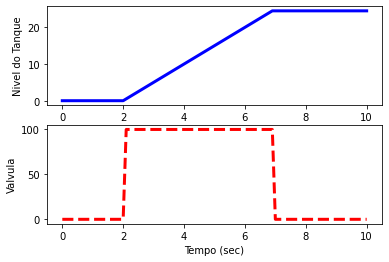

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts,z,'b-',linewidth=3)
plt.ylabel('Nivel do Tanque')
plt.subplot(2,1,2)
plt.plot(ts,u,'r--',linewidth=3)
plt.ylabel('Valvula')    
plt.xlabel('Tempo (sec)')
plt.show()